# **Introduction**: The goal of this notebook is to create a machine learning model to accurately predict cases of car insurance fraud and to understand what characterisitcs in a claim are most indicative of fraud

Data: https://www.kaggle.com/roshansharma/insurance-claim

GitHub: https://github.com/ArielJosephCohen/capstone

# **Notebook**

## Imports

In [557]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
import helper_module as hm
from helper_module import *
import warnings
warnings.filterwarnings(action='ignore')

In [558]:
df = pd.read_csv('Claims.csv')
df2 = pd.read_csv('Claims.csv')

## Look at data

In [559]:
print(df.shape)
(df.head())

(1000, 39)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [560]:
(df.columns)

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [561]:
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [562]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [563]:
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<Figure size 432x288 with 0 Axes>

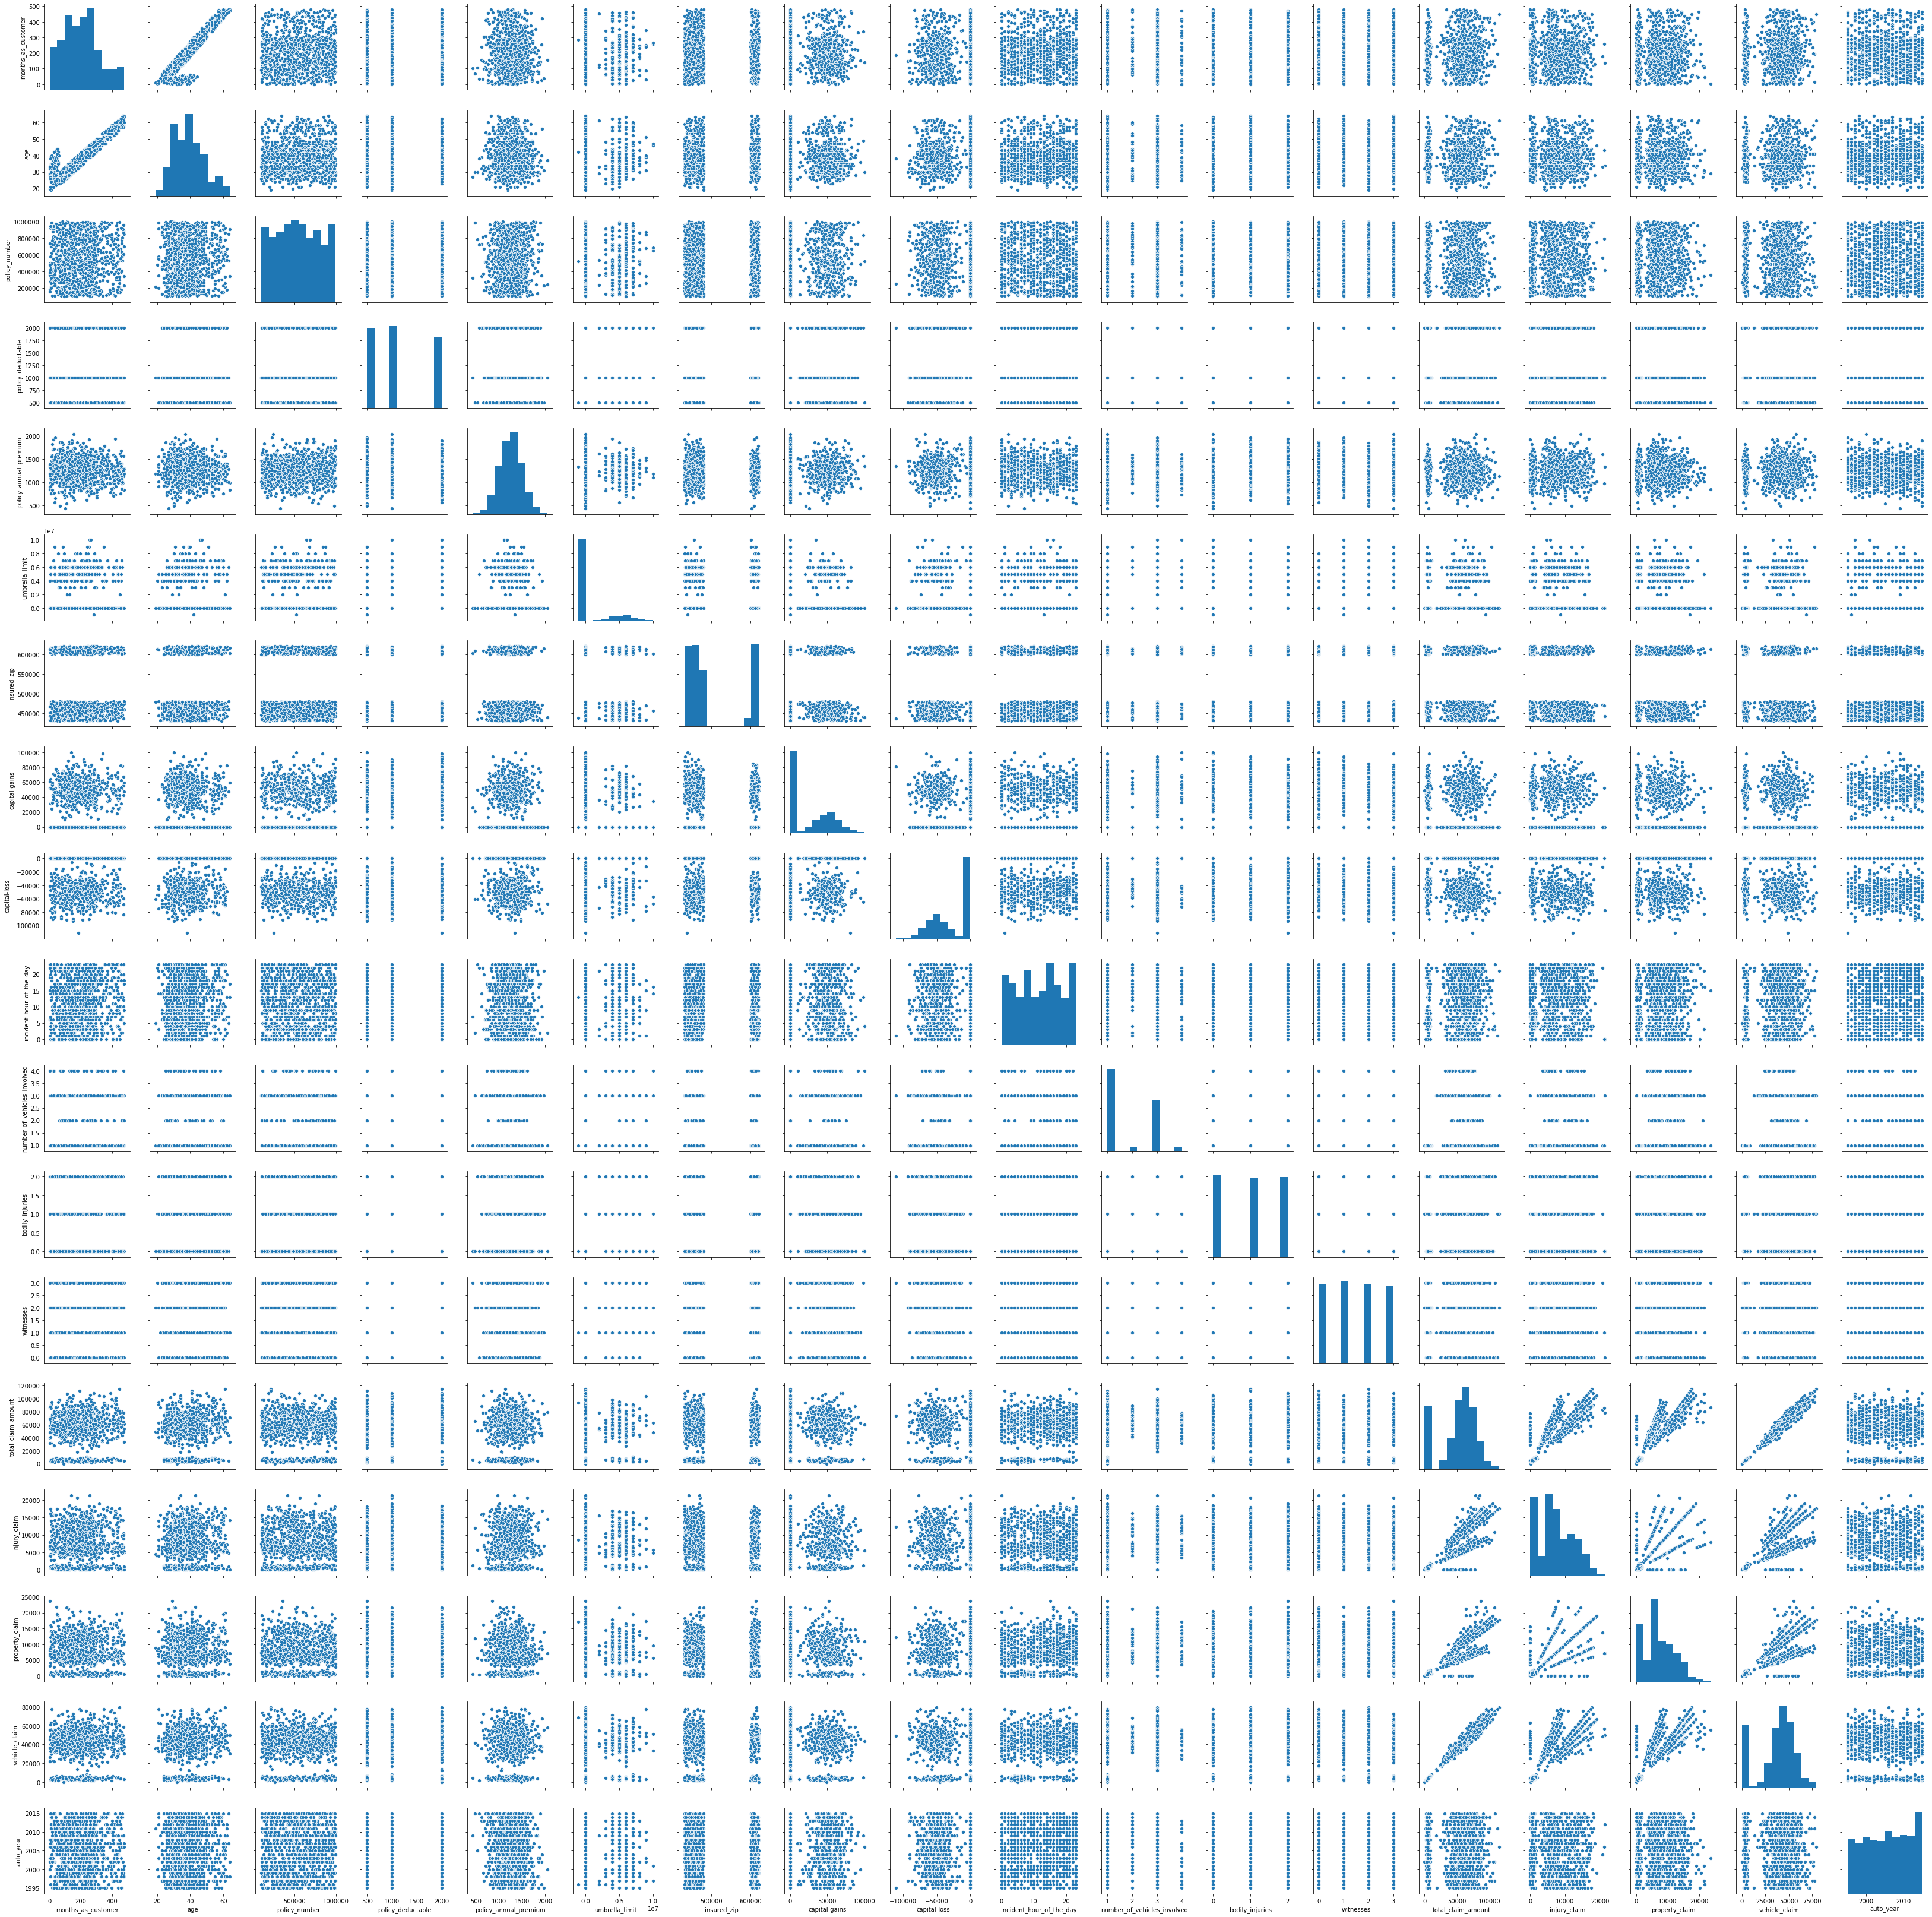

In [321]:
plt.tight_layout()
(sns.pairplot(df))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x154a9b210>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

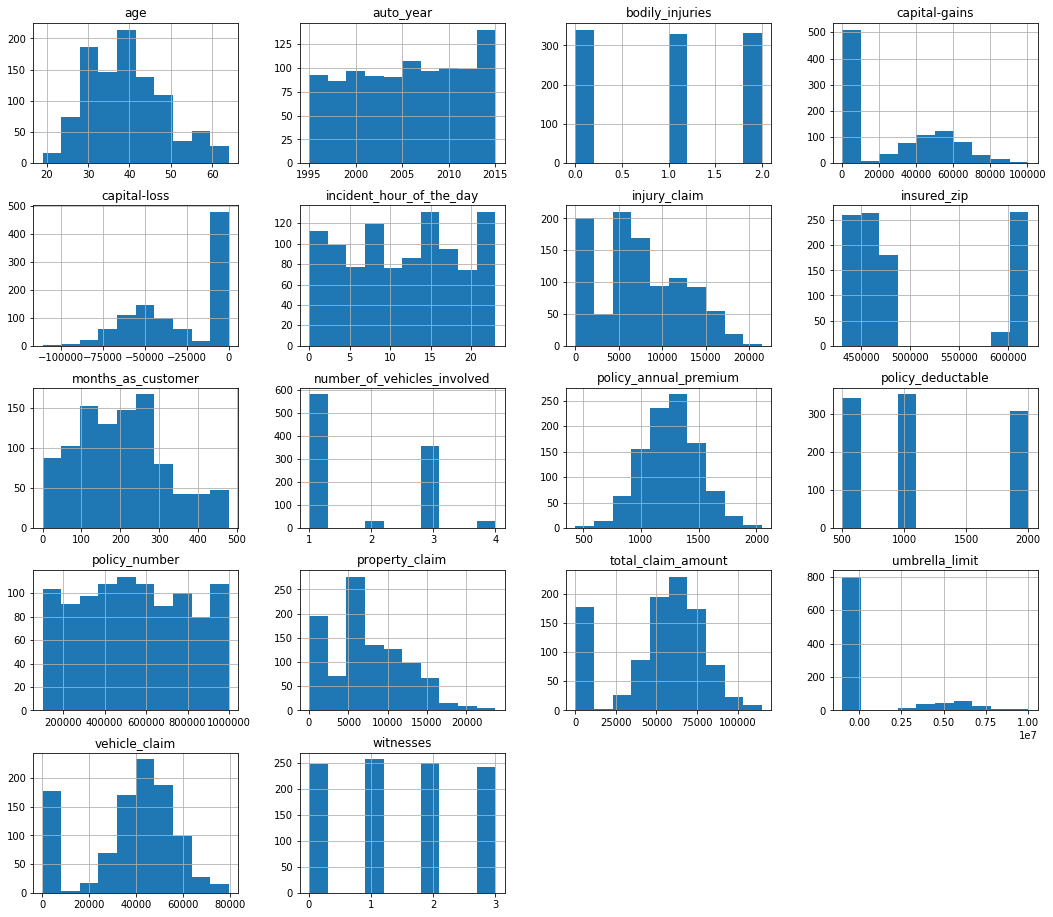

In [460]:
plt.tight_layout()
df.hist(figsize=(18,16))

## Exploratory data analysis

In [564]:
fraud_df = df[df['fraud_reported']=='Y']

In [565]:
fraud_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
14,180,38,644081,28-12-1998,OH,250/500,2000,1301.13,0,476685,...,2,YES,46200,4200,8400,33600,Dodge,Neon,2003,Y


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x155fed3d0>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

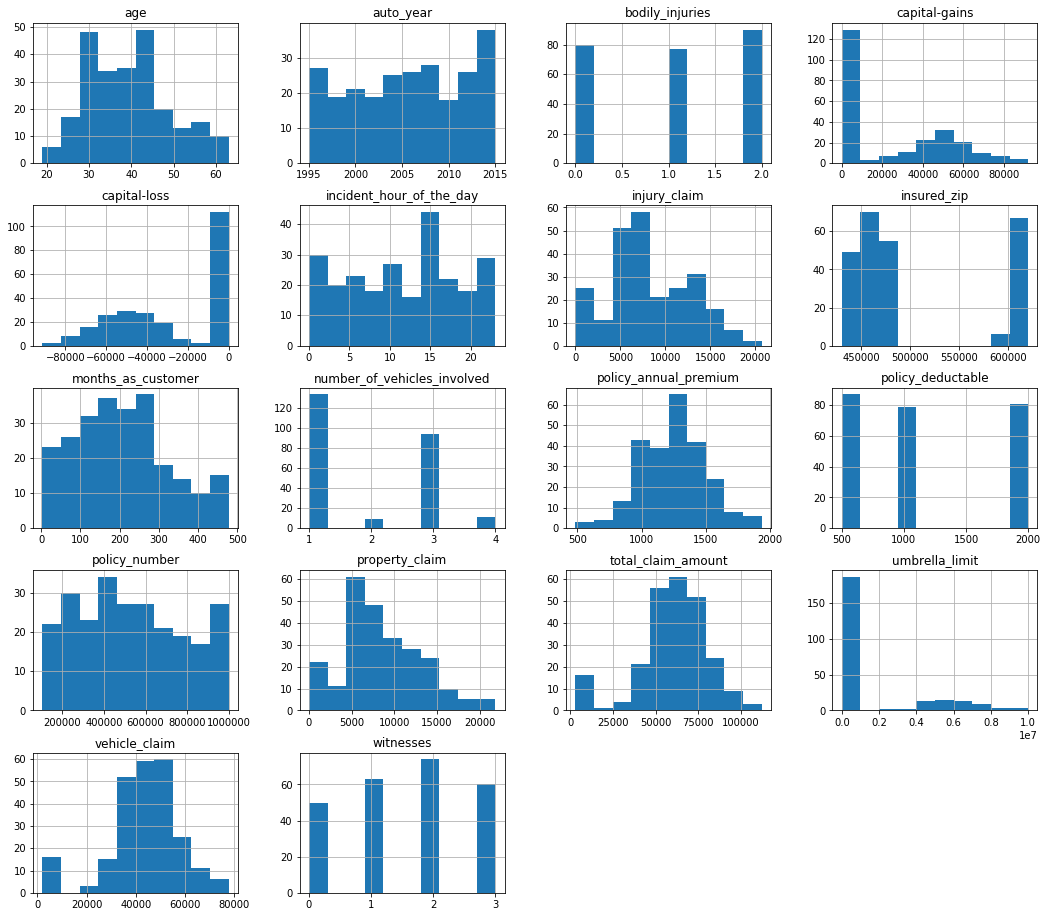

In [566]:
plt.tight_layout()
fraud_df.hist(figsize=(18,16))

## Address categorical features

In [567]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [568]:
num_list = ['months_as_customer','age','policy_number','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','witnesses','bodily_injuries','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year']

In [569]:
cat_list = ['policy_bind_date','policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make','auto_model','fraud_reported']

In [570]:
for col in cat_list:
    print (col,df[col].nunique())

policy_bind_date 951
policy_state 3
policy_csl 3
insured_sex 2
insured_education_level 7
insured_occupation 14
insured_hobbies 20
insured_relationship 6
incident_date 60
incident_type 4
collision_type 4
incident_severity 4
authorities_contacted 5
incident_state 7
incident_city 7
property_damage 3
police_report_available 3
auto_make 14
auto_model 39
fraud_reported 2


In [571]:
df[cat_list].head()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,?,?,Mercedes,E400,Y
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM,N
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,?,NO,Chevrolet,Tahoe,Y
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,NO,NO,Accura,RSX,N


In [572]:
df.policy_bind_date=pd.to_datetime(df.policy_bind_date)

In [573]:
def gender_val(row):
    if row['insured_sex'] == 'MALE':
        return 1
    else:
        return 0

In [574]:
df['insured_sex']=df.apply(gender_val,axis=1)

In [575]:
df.incident_date=pd.to_datetime(df.incident_date)

In [576]:
df['timeline']=df.incident_date-df.policy_bind_date

In [577]:
df[num_list].head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,bodily_injuries,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,2,1,71610,6510,13020,52080,2004
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,3,2,34650,7700,3850,23100,2007
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,2,1,63400,6340,6340,50720,2014
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,1,0,6500,1300,650,4550,2009


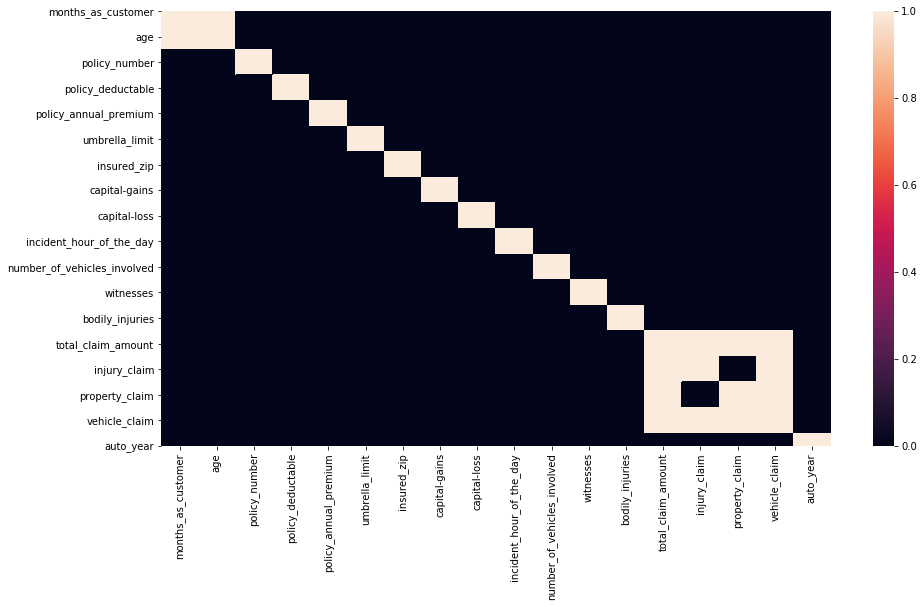

In [578]:
plt.figure(figsize=(15,8))
plt.tight_layout()
sns.heatmap(df[num_list].corr()>=0.7)

In [579]:
df.drop(['age','total_claim_amount'],axis=1,inplace=True)
num_list.remove('age')
num_list.remove('total_claim_amount')
num_list.remove('vehicle_claim')
df.drop(['vehicle_claim'],axis=1,inplace=True)

In [580]:
int(str(df.timeline[0]).split()[0])

100

In [581]:
for i in range(len(df)):
    df.timeline[i] = int(str(df.timeline[i]).split()[0])

In [582]:
df.head()

,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,auto_make,auto_model,auto_year,fraud_reported,timeline
0,328,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,1,...,1,2,YES,6510,13020,Saab,92x,2004,Y,100
1,228,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,1,...,0,0,?,780,780,Mercedes,E400,2007,Y,3130
2,134,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,0,...,2,3,NO,7700,3850,Dodge,RAM,2007,N,5371
3,256,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,0,...,1,2,NO,6340,6340,Chevrolet,Tahoe,2014,Y,9260
4,228,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,1,...,0,1,NO,1300,650,Accura,RSX,2009,N,256


In [583]:
num_list.append('timeline')

In [584]:
df_num = df[num_list]
df_cat = df[cat_list]

In [585]:
print(df_num.shape)
df_num.head()

(1000, 16)


,months_as_customer,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,bodily_injuries,injury_claim,property_claim,auto_year,timeline
0,328,521585,1000,1406.91,0,466132,53300,0,5,1,2,1,6510,13020,2004,100
1,228,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,780,780,2007,3130
2,134,687698,2000,1413.14,5000000,430632,35100,0,7,3,3,2,7700,3850,2007,5371
3,256,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,2,1,6340,6340,2014,9260
4,228,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,1,0,1300,650,2009,256


In [586]:
print(df_cat.shape)
df_cat.head()

(1000, 20)


,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,2014-10-17,OH,250/500,1,MD,craft-repair,sleeping,husband,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x,Y
1,2006-06-27,IN,250/500,1,MD,machine-op-inspct,reading,other-relative,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,?,?,Mercedes,E400,Y
2,2000-06-09,OH,100/300,0,PhD,sales,board-games,own-child,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM,N
3,1990-05-25,IL,250/500,0,PhD,armed-forces,board-games,unmarried,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,?,NO,Chevrolet,Tahoe,Y
4,2014-06-06,IL,500/1000,1,Associate,sales,board-games,unmarried,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,NO,NO,Accura,RSX,N


In [587]:
csl_df = pd.get_dummies(df_cat.policy_csl,drop_first=True)

In [588]:
education_df = pd.get_dummies(df_cat.insured_education_level,drop_first=True)

In [589]:
occupation_df = pd.get_dummies(df_cat.insured_occupation,drop_first=True)

In [590]:
hobbies_df =pd.get_dummies(df_cat.insured_hobbies,drop_first=True)

In [591]:
relationship_df=pd.get_dummies(df_cat.insured_relationship,drop_first=True)

In [592]:
incident_type_df=pd.get_dummies(df_cat.incident_type,drop_first=True)

In [593]:
collision_df=pd.get_dummies(df_cat.collision_type,drop_first=True)

In [594]:
severity_df=pd.get_dummies(df_cat.incident_severity,drop_first=True)

In [595]:
authorities_df=pd.get_dummies(df_cat.authorities_contacted,drop_first=True)

In [596]:
state_df=pd.get_dummies(df_cat.incident_state,drop_first=True)

In [597]:
city_df=pd.get_dummies(df_cat.incident_city,drop_first=True)

In [598]:
pd_df=state_df=pd.get_dummies(df_cat.property_damage,drop_first=True)

In [599]:
pra_df =state_df=pd.get_dummies(df_cat.police_report_available,drop_first=True)

In [600]:
make_df =state_df=pd.get_dummies(df_cat.auto_make,drop_first=True)

In [601]:
model_df=state_df=pd.get_dummies(df_cat.auto_model,drop_first=True)

In [602]:
dum_df_list=[csl_df,education_df,occupation_df,hobbies_df,relationship_df,incident_type_df,collision_df,severity_df,authorities_df,state_df,city_df,pd_df,pra_df,make_df]

In [603]:
for dfr in dum_df_list:
    for col in dfr.columns:
        df_cat[col]=dfr[col]

In [604]:
df_cat.drop(['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make','auto_model'],axis=1,inplace=True)

In [605]:
print(df_cat.shape)
df_cat.head()

(1000, 120)


,policy_bind_date,incident_date,fraud_reported,250/500,500/1000,College,High School,JD,MD,Masters,...,Dodge,Ford,Honda,Jeep,Mercedes,Nissan,Saab,Suburu,Toyota,Volkswagen
0,2014-10-17,2015-01-25,Y,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2006-06-27,2015-01-21,Y,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,2000-06-09,2015-02-22,N,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1990-05-25,2015-10-01,Y,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014-06-06,2015-02-17,N,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [606]:
print(df.shape)
df.head()

(1000, 37)


,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,auto_make,auto_model,auto_year,fraud_reported,timeline
0,328,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,1,...,1,2,YES,6510,13020,Saab,92x,2004,Y,100
1,228,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,1,...,0,0,?,780,780,Mercedes,E400,2007,Y,3130
2,134,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,0,...,2,3,NO,7700,3850,Dodge,RAM,2007,N,5371
3,256,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,0,...,1,2,NO,6340,6340,Chevrolet,Tahoe,2014,Y,9260
4,228,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,1,...,0,1,NO,1300,650,Accura,RSX,2009,N,256


In [607]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col in df_num.columns:
    df_num[col] = scaler.fit_transform(df_num[[col]])

In [608]:
for col in df_num.columns:
    df_num[col]=list(stats.boxcox(abs(df_num[col]+0.5)))[0]

In [609]:
print(df_num.shape)
df_num.head()

(1000, 16)


,months_as_customer,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,bodily_injuries,injury_claim,property_claim,auto_year,timeline
0,0.173632,-0.031908,-0.186891,0.103104,-5.961156,-0.499133,0.029518,0.629762,-0.290956,-1.119653,0.162041,0.000000,-0.210495,0.049125,-0.050196,-0.511761
1,-0.024219,-0.239610,0.384026,-0.026787,0.038051,-0.472496,-0.946298,0.629762,-0.154451,-1.119653,-0.559402,-0.577851,-0.558819,-0.586059,0.099258,-0.168950
2,-0.240310,0.149768,0.384026,0.106962,0.038051,-1.201180,-0.175377,0.629762,-0.199491,0.139808,0.463166,0.453457,-0.147984,-0.392702,0.099258,0.070320
3,0.034028,-0.381987,0.384026,0.108573,0.083625,0.278121,-0.013602,-0.059694,-0.290956,-1.119653,0.162041,0.000000,-0.219650,-0.256327,0.436594,0.466270
4,-0.024219,-0.210148,-0.186891,0.212725,0.083625,0.283587,0.136879,0.089778,0.358500,-1.119653,-0.172050,-0.577851,-0.523111,-0.595016,0.197134,-0.493391


In [610]:
df_atg = df_num.copy()
for col in df_cat.columns:
    df_atg[col]=df_cat[col]

In [611]:
print(df_atg.shape)
df_atg.head()

(1000, 136)


,months_as_customer,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,Dodge,Ford,Honda,Jeep,Mercedes,Nissan,Saab,Suburu,Toyota,Volkswagen
0,0.173632,-0.031908,-0.186891,0.103104,-5.961156,-0.499133,0.029518,0.629762,-0.290956,-1.119653,...,0,0,0,0,0,0,1,0,0,0
1,-0.024219,-0.239610,0.384026,-0.026787,0.038051,-0.472496,-0.946298,0.629762,-0.154451,-1.119653,...,0,0,0,0,1,0,0,0,0,0
2,-0.240310,0.149768,0.384026,0.106962,0.038051,-1.201180,-0.175377,0.629762,-0.199491,0.139808,...,1,0,0,0,0,0,0,0,0,0
3,0.034028,-0.381987,0.384026,0.108573,0.083625,0.278121,-0.013602,-0.059694,-0.290956,-1.119653,...,0,0,0,0,0,0,0,0,0,0
4,-0.024219,-0.210148,-0.186891,0.212725,0.083625,0.283587,0.136879,0.089778,0.358500,-1.119653,...,0,0,0,0,0,0,0,0,0,0


In [612]:
round(df_atg.fraud_reported.value_counts(normalize=True),2)

N    0.75
Y    0.25
Name: fraud_reported, dtype: float64

## Filter outliers

In [613]:
df_atg = df_atg[(np.abs(stats.zscore(df_atg[num_list])) <= 2.5).all(axis=1)]
print(df_atg.shape)
df_atg.head()

(985, 136)


,months_as_customer,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,Dodge,Ford,Honda,Jeep,Mercedes,Nissan,Saab,Suburu,Toyota,Volkswagen
0,0.173632,-0.031908,-0.186891,0.103104,-5.961156,-0.499133,0.029518,0.629762,-0.290956,-1.119653,...,0,0,0,0,0,0,1,0,0,0
1,-0.024219,-0.239610,0.384026,-0.026787,0.038051,-0.472496,-0.946298,0.629762,-0.154451,-1.119653,...,0,0,0,0,1,0,0,0,0,0
2,-0.240310,0.149768,0.384026,0.106962,0.038051,-1.201180,-0.175377,0.629762,-0.199491,0.139808,...,1,0,0,0,0,0,0,0,0,0
3,0.034028,-0.381987,0.384026,0.108573,0.083625,0.278121,-0.013602,-0.059694,-0.290956,-1.119653,...,0,0,0,0,0,0,0,0,0,0
4,-0.024219,-0.210148,-0.186891,0.212725,0.083625,0.283587,0.136879,0.089778,0.358500,-1.119653,...,0,0,0,0,0,0,0,0,0,0


In [614]:
round(df_atg.fraud_reported.value_counts(normalize=True),2)

N    0.76
Y    0.24
Name: fraud_reported, dtype: float64

In [615]:
int(str(df_atg.incident_date[0]).split()[0][0:4])

2015

In [616]:
int(str(df_atg.incident_date[0]).split()[0][5:7])

1

In [617]:
int(str(df_atg.policy_bind_date[0]).split()[0][0:4])

2014

In [618]:
int(str(df_atg.policy_bind_date[0]).split()[0][5:7])

10

In [619]:
df_atg['policy_bind_month']=0
df_atg['policy_bind_year']=0
df_atg['incident_month']=0
df_atg['incident_year']=0

In [620]:
for i in range(len(df_atg)):
    df_atg['policy_bind_month'][i]=int(str(df_atg.incident_date[i]).split()[0][5:7])
    df_atg['policy_bind_year'][i]= int(str(df_atg.incident_date[i]).split()[0][0:4])
    df_atg['incident_month'][i]= int(str(df_atg.policy_bind_date[i]).split()[0][5:7])
    df_atg['incident_year'][i]= int(str(df_atg.policy_bind_date[i]).split()[0][0:4])

KeyError: 43

## Reduce features

## Train-Test-Split

In [445]:
from sklearn.model_selection import train_test_split

## Model

In [446]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [448]:
## add EDA, pipeline, grid search, XGboost, and smote